In [ ]:
# I import libraries that I will use.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# For preparing
import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil
import torch
from PIL import Image, ImageOps

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/YoloV7")

In [ ]:
with open('archive/annotations/maksssksksss0.xml') as f:
    contents = f.read()
#     print(contents)

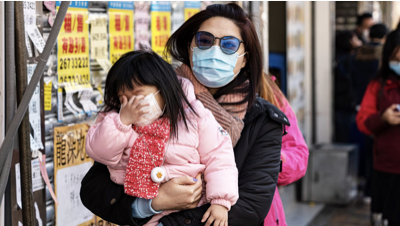

In [ ]:
im1 = Image.open("archive/images/maksssksksss100.png")
im1

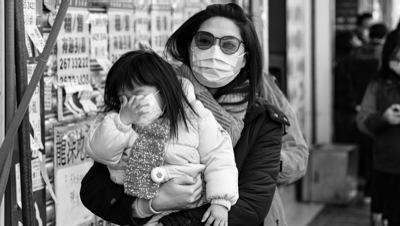

In [ ]:
# applying grayscale method
im2 = ImageOps.grayscale(im1)
im2

In [ ]:
# def xml_to_yolo_bbox(bbox, w, h):
#     # xmin, ymin, xmax, ymax
#     x_center = ((bbox[2] + bbox[0]) / 2) / w
#     y_center = ((bbox[3] + bbox[1]) / 2) / h
    
#     width = (bbox[2] - bbox[0]) / w
#     height = (bbox[3] - bbox[1]) / h
    
#     return [x_center, y_center, width, height]

# def yolo_to_xml_bbox(bbox, w, h):
#     # x_center, y_center, width, height
#     w_half_len = (bbox[2] * w) / 2
#     h_half_len = (bbox[3] * h) / 2
    
#     xmin = int((bbox[0] * w) - w_half_len)
#     ymin = int((bbox[1] * h) - h_half_len)
#     xmax = int((bbox[0] * w) + w_half_len)
#     ymax = int((bbox[1] * h) + h_half_len)
    
#     return [xmin, ymin, xmax, ymax]

# classes = []

# input_dir = "archive/annotations"
# output_dir = "archive/labels"
# image_dir = "archive/images"

# os.mkdir(output_dir)

# if not os.path.isdir(output_dir):
#     os.mkdir(output_dir)

# import glob

# files = glob.glob(os.path.join(input_dir, "*.xml"))
# for fil in files:
#     basename = os.path.basename(fil)
#     filename = os.path.splitext(basename)[0]
#     if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
#         print(f"{filename} image does not exist!")
#         continue
    
#     result = []
    
#     # Parse the content of the xml file
#     tree = ET.parse(fil)
#     root = tree.getroot()
#     width = int(root.find("size").find("width").text)
#     height = int(root.find("size").find("height").text)
    
#     for obj in root.findall("object"):
#         label = obj.find("name").text
        
#         # check for new classes and append to list
#         if label not in classes:
#             classes.append(label)
#         index = classes.index(label)
#         pil_bbox = [int(x.text) for x in obj.find("bndbox")]
#         yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        
#         # convert data to string
#         bbox_string = " ".join([str(x) for x in yolo_bbox])
#         result.append(f"{index} {bbox_string}")
    
#     if result:
#         # generate a yolo format text file for each xml file
#         with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
#             f.write("\n".join(result))
# # generate the classes file as reference
# with open("archive/classes.txt", "w", encoding = "utf-8") as f:
#     f.write(json.dumps(classes))

In [ ]:
with open('archive/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "with_mask", "mask_weared_incorrect"]


In [ ]:
# os.mkdir("archive/data/")
# os.mkdir('archive/data/train')
# os.mkdir('archive/data/val')
# os.mkdir('archive/data/test')
# os.mkdir('archive/data/train/images')
# os.mkdir('archive/data/train/labels')
# os.mkdir('archive/data/test/images')
# os.mkdir('archive/data/test/labels')
# os.mkdir('archive/data/val/images')
# os.mkdir('archive/data/val/labels')

In [ ]:
material = []

for i in os.listdir("archive/images"):
    srt = i[:-4]
    material.append(srt)

In [ ]:
def preparingData(main_txt_file, main_img_file, train_size, test_size, val_size):
    
    for i in range(0,train_size):
        
        source_txt = main_txt_file + "/" + material[i] + ".txt"
        source_img = main_img_file + "/" + material[i] + ".png"
        
        mstring = material[i]
        train_destination_txt = "archive/data/train/labels" + "/" + material[i] + ".txt" 
        train_destination_png = "archive/data/train/images" + "/" + material[i] + ".png" 
                
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
                
        #material.remove(file_name[:-4])
                
                
    for l in range(train_size , train_size + test_size):
        
        source_txt = main_txt_file + "/" + material[l] + ".txt"
        source_img = main_img_file + "/" + material[l] + ".png"
        
        mstring = material[l]
        test_destination_txt = "archive/data/test/labels" + "/" + material[l] + ".txt"
        test_destination_png = "archive/data/test/images" + "/" + material[l] + ".png"
                
        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)
                
        #material.remove(file_name[:-4])
                
                
    for n in range(train_size + test_size , train_size + test_size + val_size):
        
        source_txt = main_txt_file + "/" + material[n] + ".txt"
        source_img = main_img_file + "/" + material[n] + ".png"
        
        mstring = material[n]
        val_destination_txt = "archive/data/val/labels" + "/" + material[n] + ".txt"
        val_destination_png = "archive/data/val/images" + "/" + material[n] + ".png"
                
        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)
                
        #material.remove(file_name[:-4])

In [ ]:
# preparingData("archive/labels", "archive/images", 603, 150, 100)

KeyboardInterrupt: ignored

In [ ]:
# # configure .yaml file to guide the model for training
# %cd archive/data

# yaml_text = """train: archive/data/train/images
# val: archive/data/val/images

# nc: 3
# names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

# with open("archive/data/data.yaml", 'w') as file:
#     file.write(yaml_text)

In [ ]:
# os.chdir("../../")
# os.getcwd()

In [ ]:
!python archive/yolov7/yolov7-main/train.py --workers 8 --device 0 --batch-size 16 --epochs 50 --data archive/data/data.yaml  --cfg archive/yolov7/yolov7-main/cfg/training/yolov7.yaml --weights '' --name yolov7_1 --hyp archive/yolov7/yolov7-main/data/hyp.scratch.p5.yaml

2023-04-12 18:44:08.291267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 18:44:09.145260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2023-4-11 torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='', cfg='archive/yolov7/yolov7-main/cfg/training/yolov7.yaml', data='archive/data/data.yaml', hyp='archive/yolov7/yolov7-main/data/hyp.scratch.p5.yaml', epochs=50, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, 

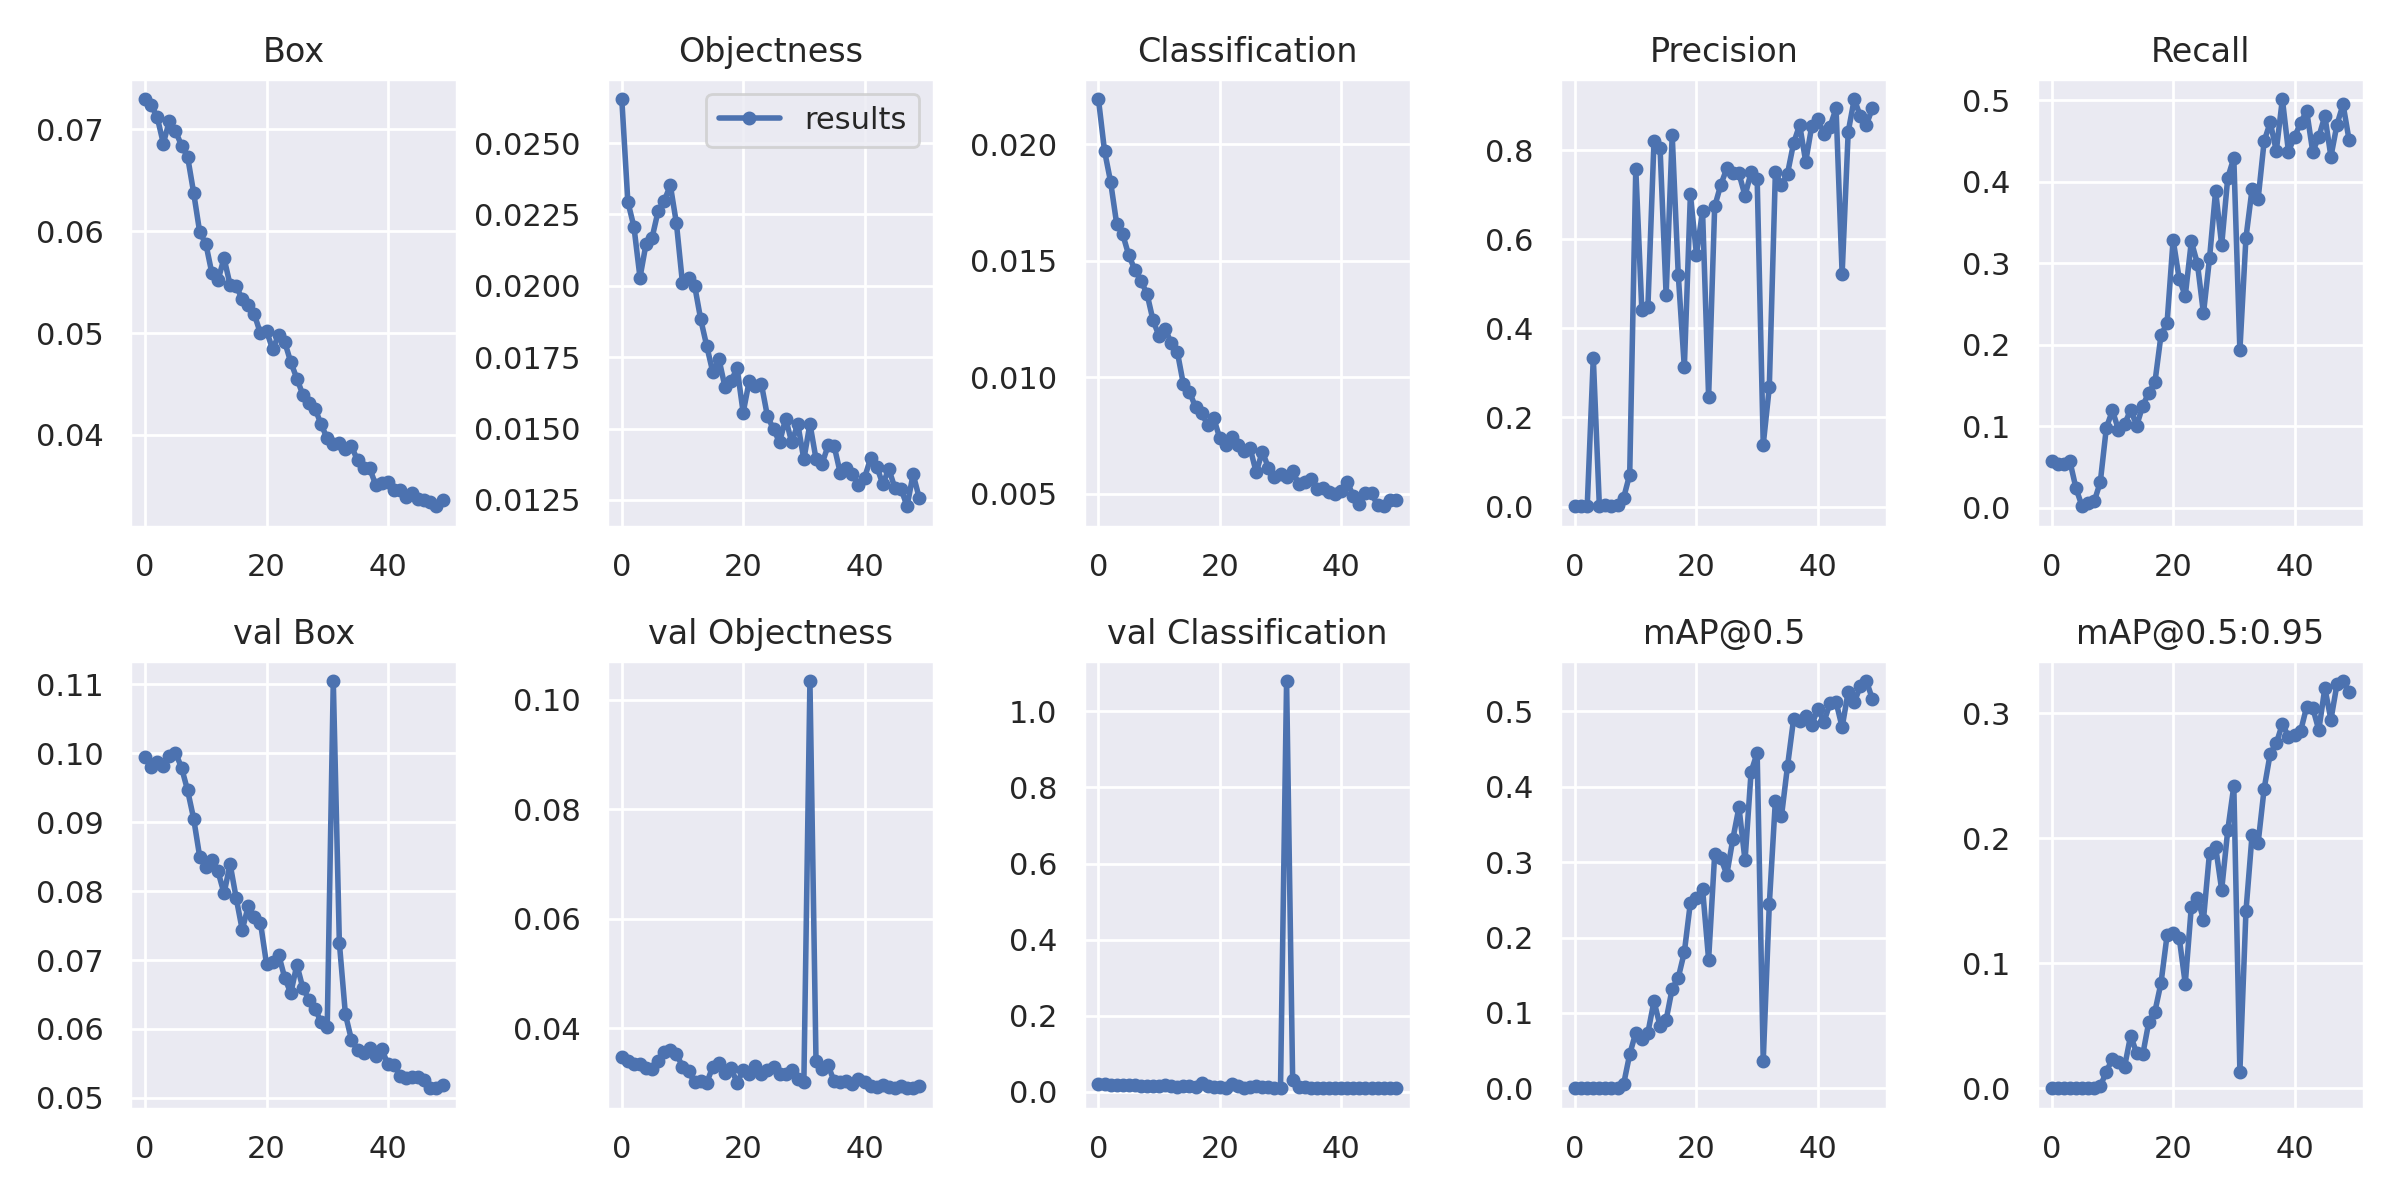

In [ ]:
Image.open("/content/drive/MyDrive/YoloV7/runs/train/yolov7_12/results.png")


In [ ]:
!python archive/yolov7/yolov7-main/detect.py --weights runs/train/yolov7_12/weights/best.pt --conf 0.25 --img-size 640 --source archive/data/test/images/

Namespace(weights=['runs/train/yolov7_12/weights/best.pt'], source='archive/data/test/images/', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 2023-4-11 torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
3 without_mas

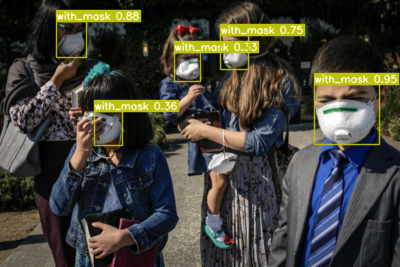

In [ ]:
Image.open("/content/drive/MyDrive/YoloV7/runs/detect/exp4/maksssksksss778.png")